time_window:  100
fire_window:  20
torch.Size([1, 28, 28, 100])


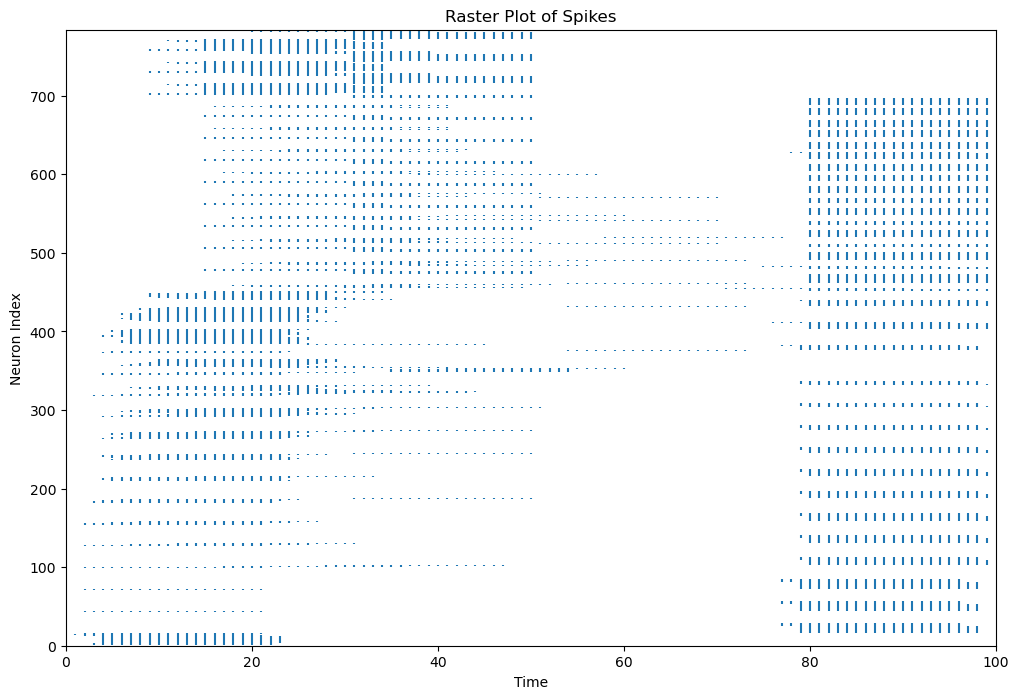

In [1]:
import cv2
import matplotlib.pyplot as plt
from encoder_ import *

x = cv2.imread("./apple_color.png", cv2.IMREAD_GRAYSCALE)
# x.reshape(1, 1, 28, 28)
x = torch.from_numpy(x).unsqueeze(0).unsqueeze(0).float()

time_window = 100
fire_window_ratio = 0.2

encoder = RLencoder(time_window, fire_window_ratio)
spike_trains = encoder(x)
print(spike_trains.shape)

def plot_raster(spike_trains, num_neurons):
    spike_trains = spike_trains.cpu().numpy()
    plt.figure(figsize=(12, 8))
    
    for neuron_idx in range(num_neurons):
        neuron_spikes = spike_trains[0, neuron_idx // 28, neuron_idx % 28]
        spike_times = neuron_spikes.nonzero()[0]
        plt.vlines(spike_times, neuron_idx + 0.5, neuron_idx + 1.5)
    
    plt.axis([0, 100, 0, 784])
    plt.xlabel('Time')
    plt.ylabel('Neuron Index')
    plt.title('Raster Plot of Spikes')
    plt.show()

# Plot the raster plot for the first 10 neurons
plot_raster(spike_trains, num_neurons=28*28)

In [5]:
spike_trains.size()
summed_tensor = torch.sum(spike_trains, dim=(3))
print(summed_tensor)

tensor([[[20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
          20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.],
         [20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.],
         [20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.],
         [20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.],
         [20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.],
         [20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20.,
          20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.],
         [20.,  0.,  0.,  0.,  0.,

In [2]:
print(x)

tensor([[[[210., 148., 148., 148., 148., 148., 148., 148., 148., 148., 148.,
           148., 148., 148., 246., 246., 246., 246., 246., 246., 246., 246.,
           246., 246., 246., 246., 246., 250.],
          [148.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0., 241., 241., 241., 241., 241., 241., 241., 241.,
           241., 241., 241., 241., 241., 246.],
          [148.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0., 241., 241., 241., 241., 241., 241., 241., 241.,
           241., 241., 241., 241., 241., 246.],
          [148.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0., 241., 241., 241., 241., 241., 241., 241., 241.,
           241., 241., 241., 241., 241., 246.],
          [148.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0., 241., 241., 241., 241., 241., 241., 241., 241.,
           241., 241., 241., 241., 241